# **SpaceX  Falcon 9 First Stage Landing Prediction**

## Exploring and Preparing Data

In this part of the project, we will perform Exploratory Data Analysis and Feature Engineering.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***

### Import Libraries and Define Auxiliary Functions

We will import the following libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
df = pd.read_csv('dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

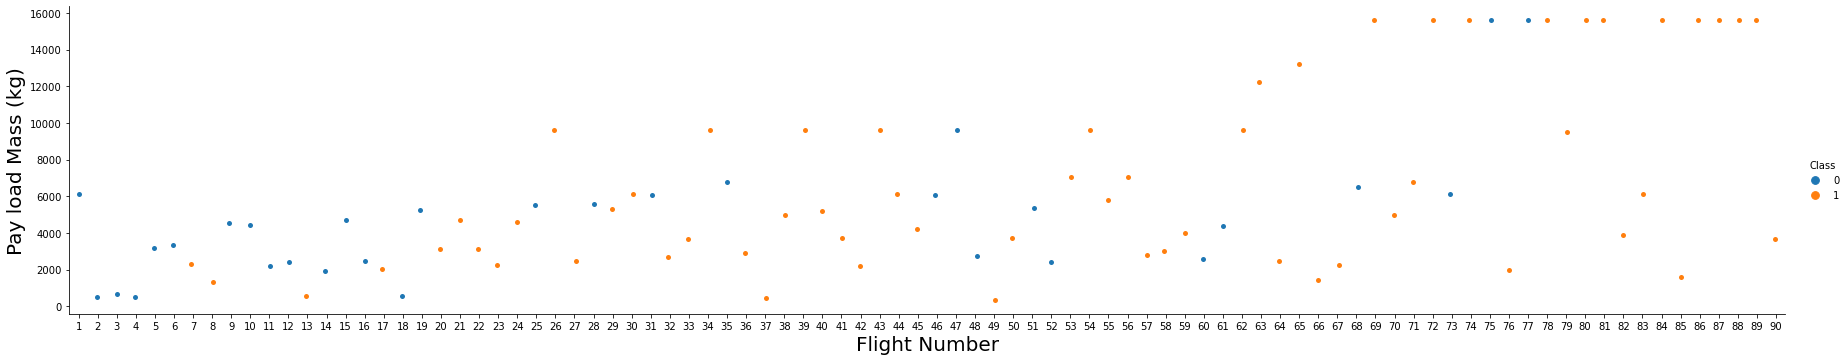

In [3]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.show()

In Data Wrangling, we saw that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

### Visualizing the relationship between Flight Number and Launch Site

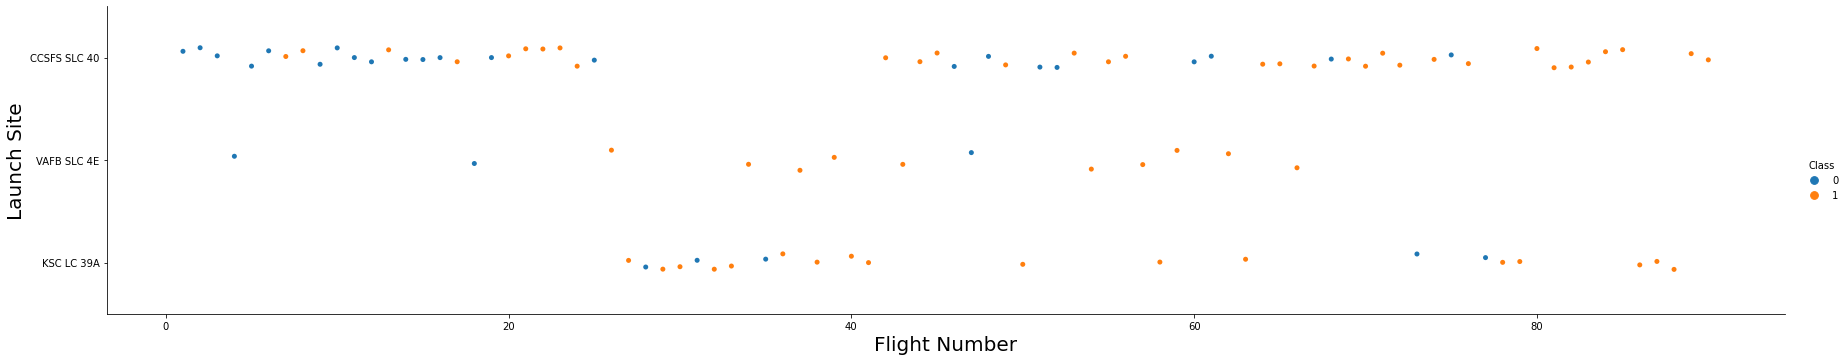

In [4]:
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Most of the launches are concentrated at <code>CCAFS LC-40</code>. The success rate at this location increased with the number of launches and was relatively high after the 60th launch. For a brief period launches seem to have been moved to <code>KSC LC-39A</code>. Launches at <code>VAFB SLC 4E</code> are sparse and have a similarly high sucess rate as those at <code>KSC LC-39A</code>.

### Visualizing the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


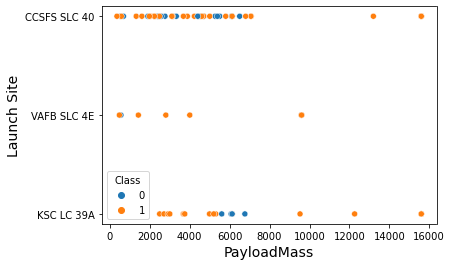

In [9]:
sns.scatterplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df, legend='brief')
plt.xlabel('PayloadMass', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### Visualizing the relationship between success rate of each orbit type

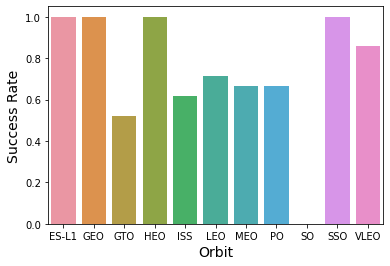

In [23]:
bar= df.groupby(by='Orbit')['Class'].mean()
sns.barplot(x=bar.index, y=bar.values);
plt.xlabel('Orbit', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.show()

In [24]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

It seems higher orbits such as ES-L1, GEO, HEO and SSO have a higher success rate than lower orbits. Looking at the number of launches made to each orbit gives additional insights. SpaceX has launched flights to each higher orbit only once and each attempt was successful.

### Visualizing the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

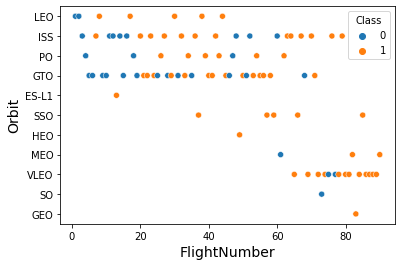

In [ ]:
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel('FlightNumber', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.show();

We see that in the LEO orbit the success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualizing the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

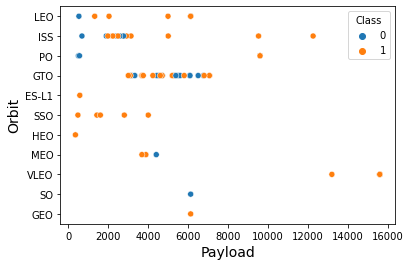

In [26]:
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.xlabel('Payload', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.show();

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### Visualizing the launch success yearly trend

We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

The following function will help us get the year from the date:


In [41]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in date:
        year.append(i.split("-")[0])
    return year

Extract_year(df['Date'])
len(year)

90

In [46]:
# Group the data by year
df_copy = df
df_copy['Year'] = year
chart = df_copy.groupby('Year')['Class'].mean()

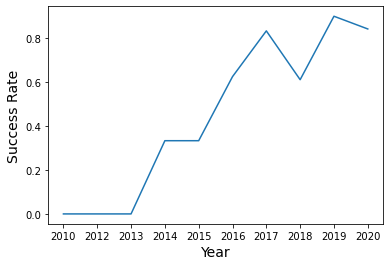

In [47]:
sns.lineplot(x=chart.index, y=chart.values, data=chart)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.show();

We can observe that the sucess rate since 2013 kept increasing till 2020.

## Feature Engineering

By now, we should have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables to categorical columns

In [52]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`

In [53]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section

In [54]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)